In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
from itertools import *
import pandas as pd
from collections import defaultdict

In [18]:
alpha = 0.55
h = 100
top = h**alpha
def sample_displacement():
    u = rnd.random()
    return (-((u * (top - 1) - top) / top))**(-1/alpha)

In [3]:
beta = 0.8
h = 17
top2 = h**beta
def sample_delay():
    u = rnd.random()
    return (-((u * (top2 - 1) - top2) / top2))**(-1/beta)

In [4]:
def sample_numhops():
    i = 0
    h = 0
    while h < 24 * 30: 
        i += 1
        h += sample_delay()
    return i

In [8]:
def distance(home, pos):
  diff = home - pos
  return np.sqrt(diff.dot(diff)).astype(int)


For a given frequency f and radius r, we plot the number of people who visit at least one place with distance between r and r+2 of their homes exactly f times a month.


In [ ]:
# We should incorperate delta-r as 2

In [54]:
rho = 0.6
gamma = 0.21

def walkers(n):
    freq_dist_count = np.zeros((10, 100)).astype(int)
    cell_dists = np.zeros((100,100))
    for i in range(n):
        cell_freq = np.zeros((100,100)).astype(int)
        visits = np.array([1.0])
        S = 1
        home = rnd.uniform(0, 99, 2)
        pos = home
        visited = [pos]
        loc = S
        for _ in range(sample_numhops() + 1):
            try:
                loctup = tuple(pos.astype(int))
                cell_freq[loctup] += 1
                cell_dists[loctup] += distance(home, pos)
            except: pass
            if rnd.random() < rho * S ** -gamma:
                visits = np.append(visits, [1])
                S += 1
                loc = S
                theta = rnd.rand() * 2 * np.pi
                r = sample_displacement()
                h = np.array([np.cos(theta), np.sin(theta)])
                pos = pos + h * r
                visited.append(pos)
            else:
                loc = rnd.choice(S, p=visits / visits.sum())
                visits[loc] += 1
                pos = visited[loc]
        seen = set()
        for i, col in enumerate(cell_freq):
            for j, f in enumerate(col):
                if f == 0: continue
                d = distance(home, [i,j])
                if d >= 100 or f >= 10: continue
                if (f, d) in seen: continue
                seen.add((f,d))
                freq_dist_count[f-1][d] += 1
    return freq_dist_count, cell_dists

In [ ]:
# For each cell c
# For each visitor v
# Increment a counts[c][distance(c,v)][frequency]
# Take average over c for counts[c]

In [55]:
freq_dist_count, cell_dists = walkers(1000)

<IPython.core.display.Javascript object>


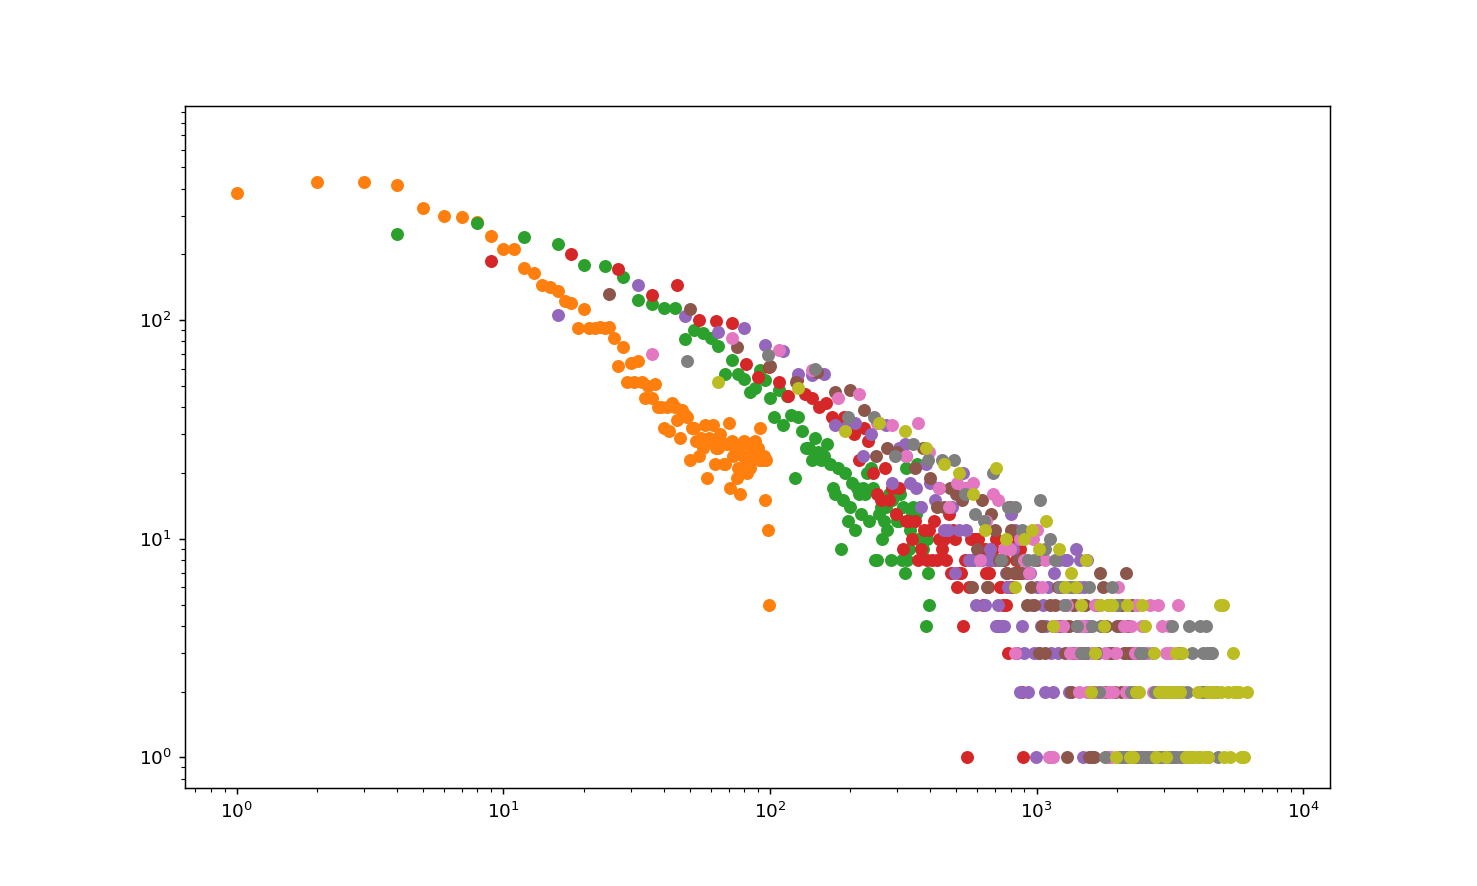

/usr/lib/python3.6/site-packages/matplotlib/ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


In [52]:
for f in range(10):
    plt.loglog(np.arange(100) * f**2, freq_dist_count[f], 'o')
